# Plotting Final Results

In [14]:
import json
import matplotlib.pyplot as plt
import numpy as np



In [15]:
RESULTS_PATH = 'data/results/'
file_names = ['f_PPO_counting_1_deck_linear_lr_results.json',]
odds = 20.0
baseline_file_name = 'baselines_performance.json'


In [16]:
results_dict = {}

for file_name in file_names:
    with open(RESULTS_PATH + file_name) as f:
        model_name = file_name.replace('_results.json', '.zip')
        results_dict[model_name] = json.load(f)[model_name]

with open(RESULTS_PATH + baseline_file_name) as f:
    baseline_dict = json.load(f)
    for baseline_name, baseline_results in baseline_dict.items():
        results_dict[baseline_name] = baseline_results


print(results_dict)


{'f_PPO_counting_1_deck_linear_lr.zip': {'avg_return': [0.0002, 0.00964, 0.005995, 0.00325, 0.001725], 'avg_return_bet_high': [0.07768037761294673, 0.08021210900792053, 0.07559138363948725, 0.0735575608422204, 0.055088702147525676], 'avg_return_bet_low': [-0.006005292433979586, 0.003959978822487061, 0.00029751279305010117, -0.0022980816951858963, -0.0025999156784104298], 'avg_return_bet_dynamic': [0.10964, 0.123165, 0.114675, 0.10547, 0.080195], 'avg_bet': [2.40885, 2.41531, 2.43773, 2.38966, 2.42443], 'avg_edge': [0.045515494945720984, 0.05099345425638945, 0.047041715038170756, 0.044135985872467205, 0.03307787809918208], 'min_edge': 0.03307787809918208, 'max_edge': 0.05099345425638945}, 'baseline_1_no_count': {'avg_edge': [0.0031561166429587484, 0.006549167765619988, 0.00039183208214225285, -0.004426865512270648, -0.0011997145660511998], 'min_edge': -0.004426865512270648, 'max_edge': 0.006549167765619988}, 'baseline_2_no_count': {'avg_edge': [-0.0011220606888476927, 0.0064894740110538

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'f_PPO_counting_1_deck_linear_lr.zip'),
  Text(1, 0, 'baseline_1_no_count'),
  Text(2, 0, 'baseline_2_no_count'),
  Text(3, 0, 'baseline_4_no_count'),
  Text(4, 0, 'baseline_1_count'),
  Text(5, 0, 'baseline_2_count'),
  Text(6, 0, 'baseline_4_count')])

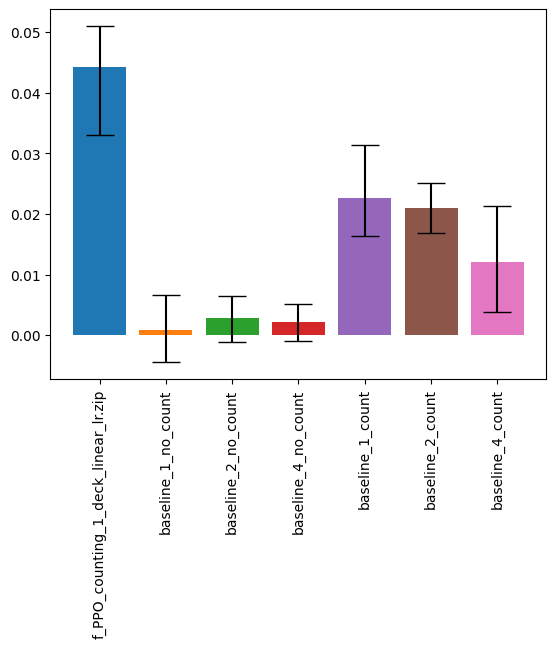

In [17]:
#bar plot comparing baseline to models

fig, ax = plt.subplots()
model_names = list(results_dict.keys())

for model_name in model_names:
    #use min max error bars
    mean_edge = np.mean(results_dict[model_name]['avg_edge'])
    err_top = results_dict[model_name]['max_edge'] - mean_edge
    err_bottom = mean_edge - results_dict[model_name]['min_edge']
    ax.bar(model_name, mean_edge, yerr=[[err_bottom], [err_top]], capsize=10)
#rotate x labels
plt.xticks(rotation=90)